In [ ]:
# pip install seaborn

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# to allows plots displayed directly in the output cells of the notebook, instead of in a separate window. 
%matplotlib inline

The "tips" dataset in Seaborn is a built-in dataset that provides information about different aspects of tips received by servers at a restaurant. This dataset contains information such as total bill amount, tip amount, time of day, day of the week, and gender of the person paying the bill. This dataset is used in various data analysis and visualizations tutorials and examples to demonstrate the functionality of Seaborn library.
* total_bill: total bill (cost) of the meal, in US dollars
* tip: tip (gratuity) left by the diners, in US dollars
* sex: gender of the person who paid the bill ("Male" or "Female")
* smoker: smoker or non-smoker (Yes or No)
* day: day of the week (Thur, Fri, Sat, Sun)
* time: time of the meal (Lunch or Dinner)
* size: number of diners

In [125]:
tips = sns.load_dataset('tips')
tips.head(10).tail(2)

,total_bill,tip,sex,smoker,day,time,size
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [137]:
pd.crosstab(tips['sex'], tips['day']).sum()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

# Countplot
This is similar to the barplot in R with the following common options (for me at least):
- data: DataFrame or array-like
- x: Categorical column name or vector
- y: Column name or vector for vertical plotting.
- hue: Column name or vector for color encoding
- order: Order to plot the categorical levels in
- hue_order: Order to plot the categorical levels of the hue variable in
- palette: Color palette name or list of colors

A palette is a sequence of colors that can be used to define the colors of the visual elements in a plot. There is a variety of built-in color palettes in seasborn or we can create a custom palette. Some examples of built-in color palettes in seaborn are: *deep*, *muted*, *bright*, *dark*, *pastel*, etc. You can access these palettes using the "color_palette()" function, e.g. `sns.color_palette('bright')` or using directly the name of the palette as an argument in the plotting functions.
- color: Color for all of the elements, or seed for a gradient palette
- dodge: Shift bars along the categorical axis. If you set `dodge=True` each category has its own space.
- linewidth: The width of the line in points
- alpha: The transparency of the fill color.

In [ ]:
# Countplot is a barplot showing the counts of observations in each categories of the variable.
sns.countplot(data = tips, x = 'sex')
plt.show()

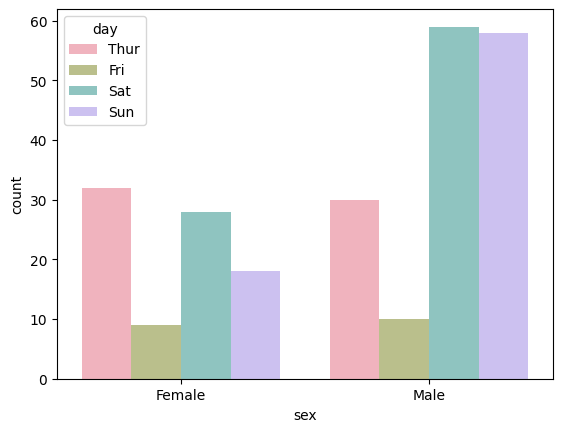

In [119]:
# using hue to specify a second categorical variable to group the data by and add additional color distinction to the plot.
sns.countplot(data = tips,
              x = 'sex',
              hue ='day',
              order = ['Female', 'Male'],
              palette = "husl",
              dodge = True,
              linewidth = 1,
              alpha = 0.6
             )
plt.show()

# Histogram
Using `histplot` from seaborn with the following options:
- data: The dataset that you want to plot.
- x: The name of the column in data that should be used for the x-axis.
- bins: The number of bins to use in the histogram.
- hist: Whether to show the histogram.
- kde: Whether to show the kernel density estimate (KDE) plot.
- kde_kws: A dictionary of additional keyword arguments to pass to the kdeplot function.
- rug: Whether to show the rug plot (vertical lines representing individual observations).
- fit: The type of distribution to fit to the data.
- color: The color to use for the histogram and KDE plot.
- fill: Whether to fill the histogram.
- line_kws: A dictionary of additional keyword arguments to pass to the plot function for the KDE plot.
- ax: The matplotlib axes to use for the plot. If not provided, a new axes will be created.

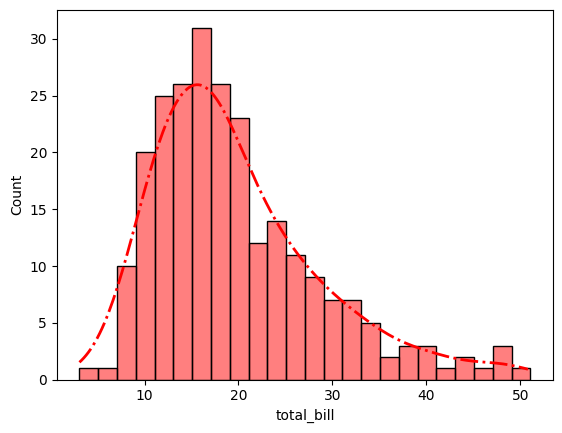

In [48]:
sns.histplot(data = tips['total_bill'], 
             bins = 5,
             binwidth= 2,
             kde = True,
             color = "red",
             fill = "blue",
             line_kws = {'color': 'red', 
                         'linewidth': 2,
                        'linestyle': "-."}
            ) 
plt.show()

# Scatter Plot
To make a scatterplot with the options:
- x and y: the x and y variables that are used to create the scatter plot
- hue: the column in the data used to color-code the points in the scatter plot
- style: the column in the data used to style-code the points in the scatter plot
- size: the column in the data used to size-code the points in the scatter plot
- palette: the color palette used for the hue or style encoding
- markers: the marker style used for plotting the points
- alpha: the transparency of the plotted points
- legend: whether to show the legend or not

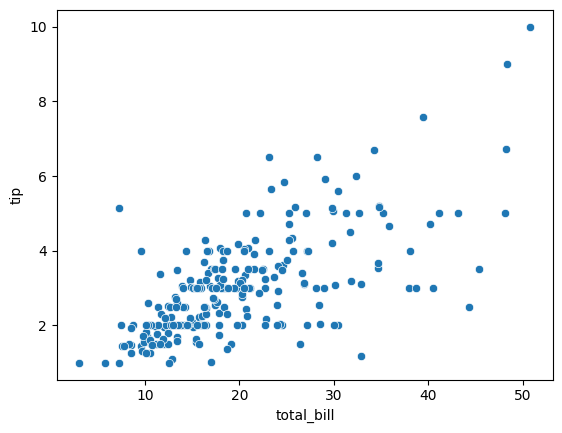

In [51]:
sns.scatterplot(x = tips['total_bill'], 
                y = tips['tip'],
               )
plt.show()

## Pairwise Plot

In [ ]:
sns.pairplot(tips) ; plt.show()

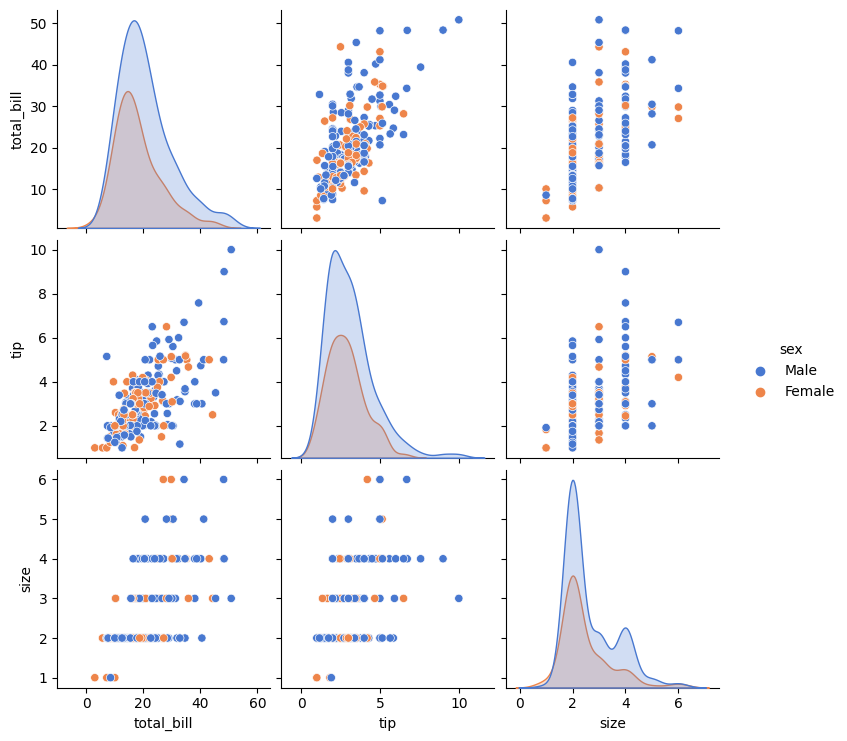

In [124]:
sns.pairplot(tips, 
             hue = 'sex', 
             palette = 'muted')
plt.show()

## Join Plot

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
plt.show()

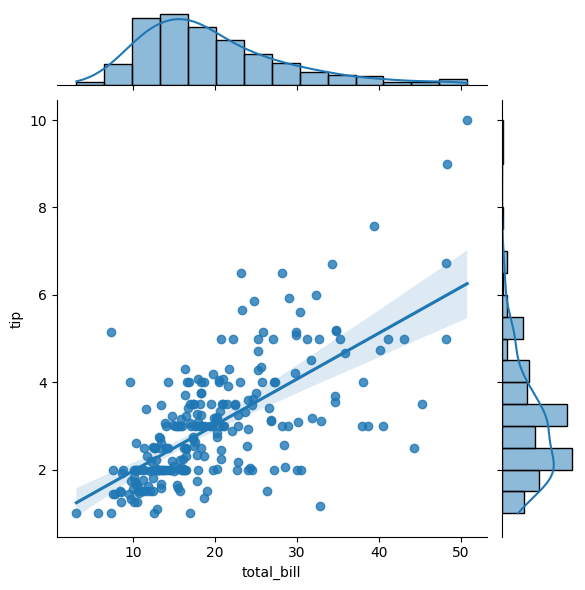

In [59]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

# Boxplot

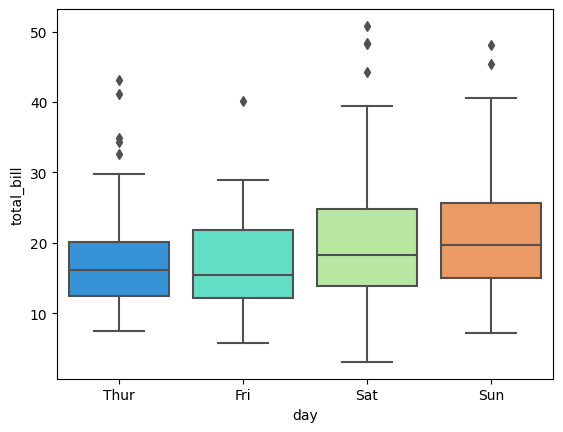

In [54]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')
plt.show()

To make frames and include multiple charts

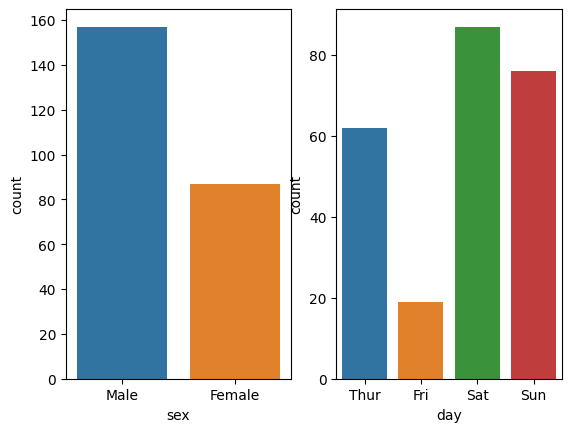

In [60]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
sns.countplot(x='sex',data=tips) 
plt.subplot(1,2,2)
sns.countplot(x='day',data=tips,);